In [37]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O
import seaborn as sns # For creating plots
import matplotlib.pyplot as plt # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import sklearn.metrics as metrics


In [38]:
#loading data 
telecom_customer= pd.read_csv('churn_prediction_dataset.csv')

In [39]:
df= telecom_customer
#understanding data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df = telecom_customer

In [41]:
df.shape 

(7043, 21)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [44]:
# Check  is there any missing values
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
df.TotalCharges = pd.to_numeric(telecom_customer.TotalCharges, errors = 'coerce')


In [46]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [47]:
# Data Manipulation Removing Missing Values 
telecom_customer.dropna(inplace = True )
df2 = telecom_customer.drop(telecom_customer.columns[0], axis = 1 )

In [48]:
df.groupby('PaymentMethod')['TotalCharges'].mean() # total charges is dropped 

PaymentMethod
Bank transfer (automatic)    3079.299546
Credit card (automatic)      3071.396022
Electronic check             2090.868182
Mailed check                 1054.483915
Name: TotalCharges, dtype: float64

In [49]:
df.groupby(['PaymentMethod','Churn'])['TotalCharges'].mean() # other options : PAYMENT METHOD and Churn are  used , totol charges is filled 

PaymentMethod              Churn
Bank transfer (automatic)  No       3241.953388
                           Yes      2269.812984
Credit card (automatic)    No       3201.189721
                           Yes      2350.257759
Electronic check           No       2609.989838
                           Yes      1463.656769
Mailed check               No       1178.173804
                           Yes       534.022565
Name: TotalCharges, dtype: float64

In [50]:
df['yk']=df.groupby('PaymentMethod')['TotalCharges'].mean() 

In [51]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['yk'])

In [52]:
df['TotalCharges'].mean() 

2283.300440841866

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [54]:
df['TotalCharges'].mean()

2283.300440841866

In [55]:
df2# Data Manipulation  
df2['Churn'].replace(to_replace = 'Yes', value = 1 , inplace = True) 
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)                 

C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\2488292832.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Churn'].replace(to_replace = 'Yes', value = 1 , inplace = True)
C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\2488292832.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [56]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [57]:
X = df2.drop("Churn",axis = 1)
y = df2["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [58]:
model = LogisticRegression()
#model.fit(X_train,y_train)

In [59]:
df_dummies = pd.get_dummies(df2) 
df_dummies.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [60]:
df_dummies = pd.get_dummies(df) 
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,yk,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,NaN,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
1,0,34,56.95,1889.50,NaN,False,False,False,False,False,...,True,False,True,False,False,False,False,True,True,False
2,0,2,53.85,108.15,NaN,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
3,0,45,42.30,1840.75,NaN,False,False,False,False,False,...,True,False,True,False,True,False,False,False,True,False
4,0,2,70.70,151.65,NaN,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True


In [61]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,yk
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,NaN
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NaN
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,NaN
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,NaN
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,NaN
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,NaN


In [62]:
for i in df.columns:
    print(i,df[i].nunique()) 

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2
yk 0


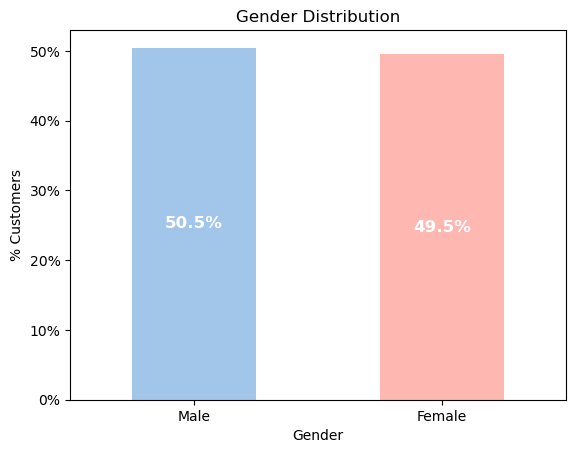

In [65]:
colors = ['#A1C6EA', '#FFB7B2']
gender_counts = telecom_customer['gender'].value_counts()
gender_percentages = gender_counts*100.0/ len(telecom_customer)
ax = gender_percentages.plot(kind = 'bar', stacked=True, rot=0, color= colors)
# Format the y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')
# Calculate and set the percentage labels on the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='white', weight='bold')

plt.show()

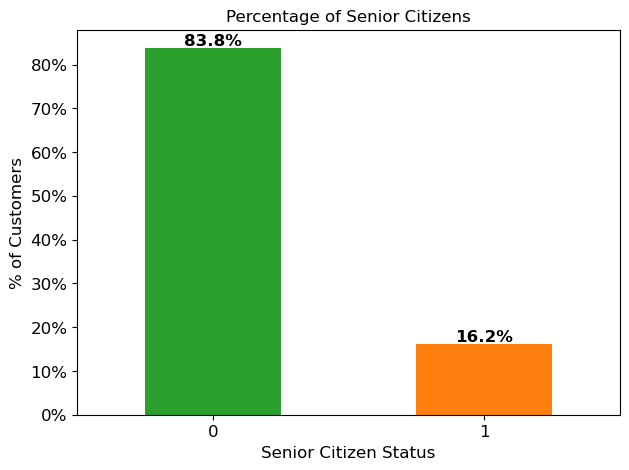

In [66]:
# This bar graph indicates the percentage of senior citizens .
# 16% of the customers who are senior citizens so most of the customers in the data are younger people.

# Define the colors for the bar chart
colors = ['#2ca02c', '#ff7f0e']

# Calculate the percentage of Senior Citizens
senior_citizen_percentages = telecom_customer['SeniorCitizen'].value_counts() * 100.0 / len(telecom_customer)

# Plot the data as a bar chart
ax = senior_citizen_percentages.plot(kind='bar', color=colors, figsize=(7,5), fontsize=12, rot=0)

# Format the y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of Customers', fontsize=12)
ax.set_xlabel('Senior Citizen Status', fontsize=12)
ax.set_title('Percentage of Senior Citizens', fontsize=12)

# Add the percentage labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', weight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.show()

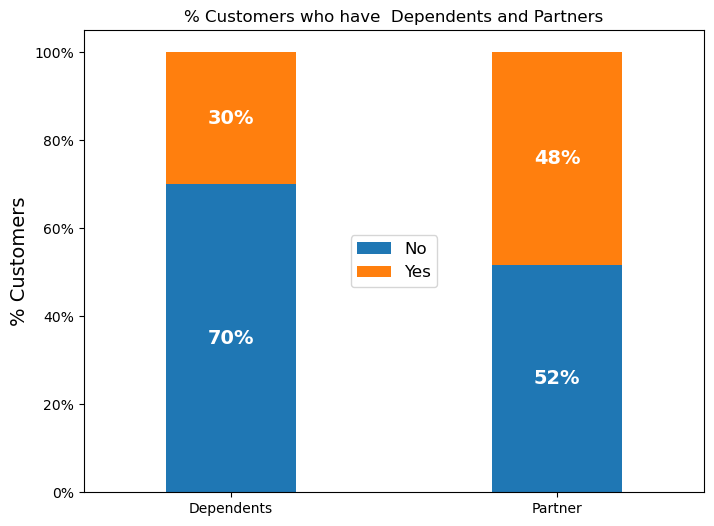

In [67]:
#70% of customers do not have dependents, 30% of customers have dependents.
#52% of customers do not have a partner, 48% of customers have a partner.
#This shows that most customers do not have dependents and almost 
#half have a partner.

# Group by according the variables
df2 = pd.melt(telecom_customer, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])
df3 = df2.groupby(['variable', 'value']).count().unstack()
df3 = df3 * 100 / len(telecom_customer)


colors = ['#1f77b4', '#ff7f0e']


fig, ax = plt.subplots(figsize=(8, 6))
df3.loc[:, 'customerID'].plot(kind='bar', stacked=True, color=colors, ax=ax, width=0.4, rot=0)


ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', fontsize=14)
ax.set_xlabel('')
ax.set_title('% Customers who have  Dependents and Partners', fontsize=12)
ax.legend(['No', 'Yes'], loc='center', prop={'size': 12})

for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2
    ax.annotate(f'{height:.0f}%', (x, y), ha='center', va='center', color='white', weight='bold', fontsize=14)

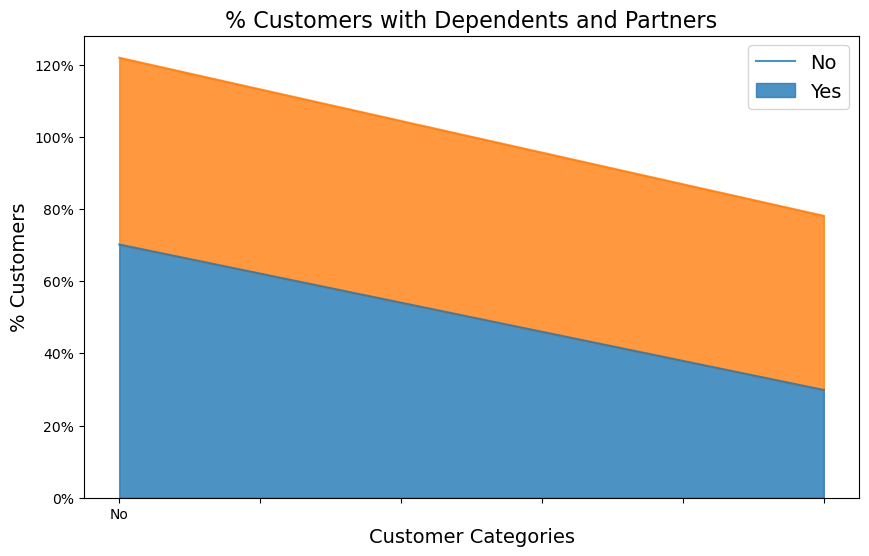

In [68]:
# Data Preparation
df2 = pd.melt(telecom_customer, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])
df3 = df2.groupby(['variable', 'value']).count().unstack()
df3 = df3 * 100 / len(telecom_customer)
df3 = df3['customerID']


colors = ['#1f77b4', '#ff7f0e']


fig, ax = plt.subplots(figsize=(10, 6))

df3.T.plot(kind='area', stacked=True, color=colors, ax=ax, alpha=0.8)


ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', fontsize=14)
ax.set_xlabel('Customer Categories', fontsize=14)
ax.set_title('% Customers with Dependents and Partners', fontsize=16)
ax.legend(['No', 'Yes'], loc='upper right', prop={'size': 14})



In [69]:
for idx, row in df3.iterrows():
    for i, (colname, value) in enumerate(row.items()):
        ax.annotate(f'{value:.0f}%', 
                    xy=(idx, row[:i+1].sum()), 
                    xytext=(0, 0), 
                    textcoords='offset points', 
                    ha='center', 
                    va='center', 
                    color='black', 
                    fontsize=12, 
                    weight='bold')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

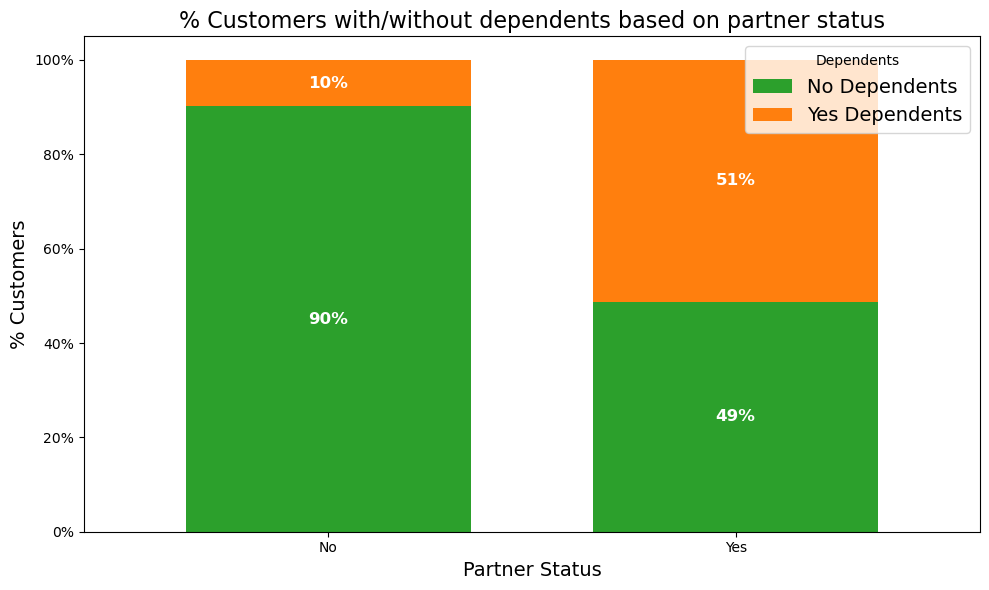

In [70]:
#Group by telecom customer according to partner , dependents 
partner_dependents = telecom_customer.groupby(['Partner', 'Dependents']).size().unstack()
partner_dependents_percent = (partner_dependents.T * 100.0 / partner_dependents.T.sum()).T


colors = ['#2ca02c', '#ff7f0e']


fig, ax = plt.subplots(figsize=(10, 6))


partner_dependents_percent.plot(kind='bar', stacked=True, width=0.7, color=colors, ax=ax, rot=0)


ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', fontsize=14)
ax.set_xlabel('Partner Status', fontsize=14)
ax.set_title('% Customers with/without dependents based on partner status', fontsize=16)
ax.legend(['No Dependents', 'Yes Dependents'], loc='upper right', prop={'size':14}, title='Dependents', fontsize=14)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width / 2.
    y = p.get_y() + height / 2.
    ax.annotate(f'{height:.0f}%', 
                xy=(x, y), 
                xytext=(0, 0), 
                textcoords='offset points', 
                ha='center', 
                va='center', 
                color='white', 
                fontsize=12, 
                weight='bold')

plt.tight_layout()
plt.show()


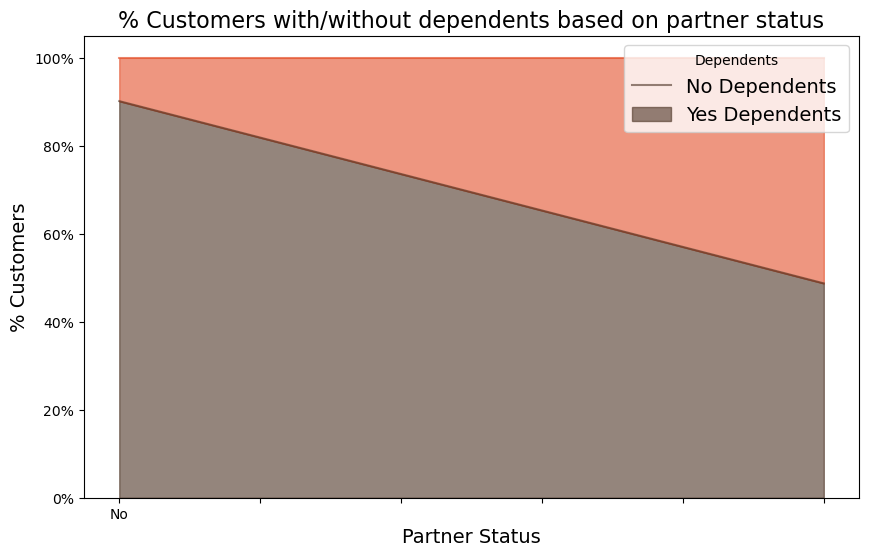

In [71]:
# Data Preparation
partner_dependents = telecom_customer.groupby(['Partner', 'Dependents']).size().unstack()
partner_dependents_percent = (partner_dependents.T * 100.0 / partner_dependents.T.sum()).T


colors = ['#4D3425', '#E4512B']


fig, ax = plt.subplots(figsize=(10, 6))


partner_dependents_percent.plot(kind='area', stacked=True, color=colors, ax=ax, alpha=0.6)


ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', fontsize=14)
ax.set_xlabel('Partner Status', fontsize=14)
ax.set_title('% Customers with/without dependents based on partner status', fontsize=16)
ax.legend(['No Dependents', 'Yes Dependents'], loc='upper right', prop={'size':14}, title='Dependents', fontsize=14)

C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\2536429893.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telecom_customer['tenure'], bins=int(180/5), color='darkblue', kde=False, hist_kws={'edgecolor':'black'})  # distplot fonksiyonunu kullandık


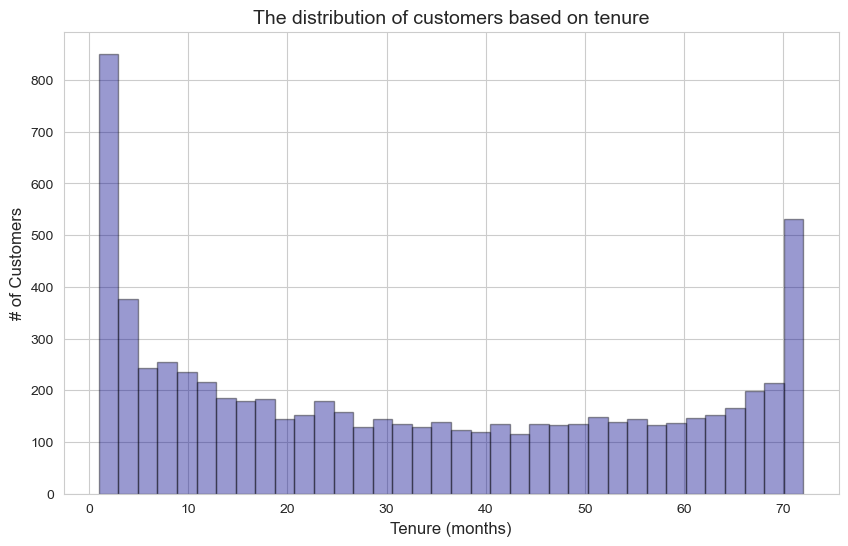

In [73]:
sns.set_style('whitegrid')  

plt.figure(figsize=(10, 6))  
sns.distplot(telecom_customer['tenure'], bins=int(180/5), color='darkblue', kde=False, hist_kws={'edgecolor':'black'})  
plt.xlabel('Tenure (months)', fontsize=12)  
plt.ylabel('# of Customers', fontsize=12)  
plt.title('The distribution of customers based on tenure', fontsize=14)  
plt.show()


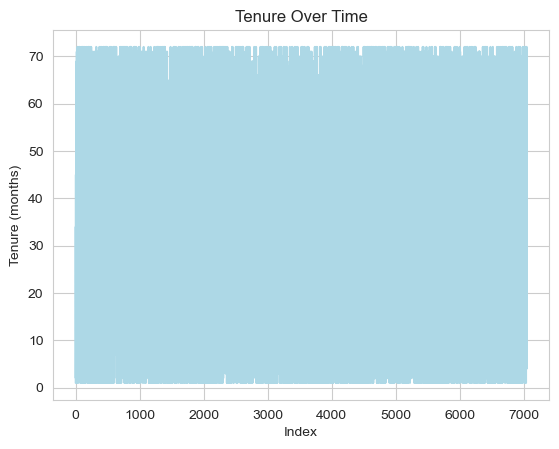

In [74]:
sns.lineplot(data=telecom_customer, x=telecom_customer.index, y='tenure', color='lightblue')  
plt.ylabel('Tenure (months)')
plt.xlabel('Index')
plt.title('Tenure Over Time')
plt.show()

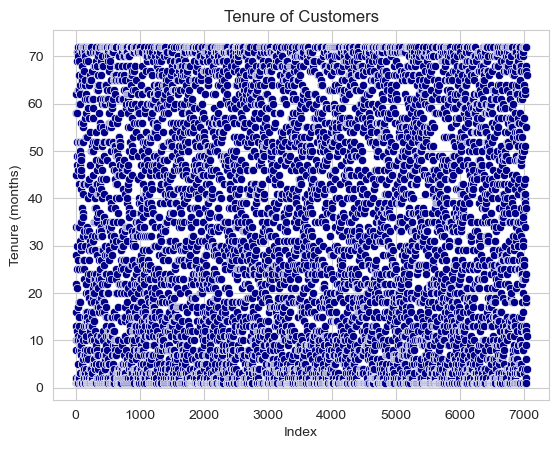

In [75]:
sns.scatterplot(data=telecom_customer, x=telecom_customer.index, y='tenure', color='darkblue')  
plt.xlabel('Index')
plt.ylabel('Tenure (months)')
plt.title('Tenure of Customers')
plt.show()

C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\2865844933.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telecom_customer, x='Contract', palette='pastel')  # countplot ile kontrat türlerine göre müşteri sayısını gösterdik


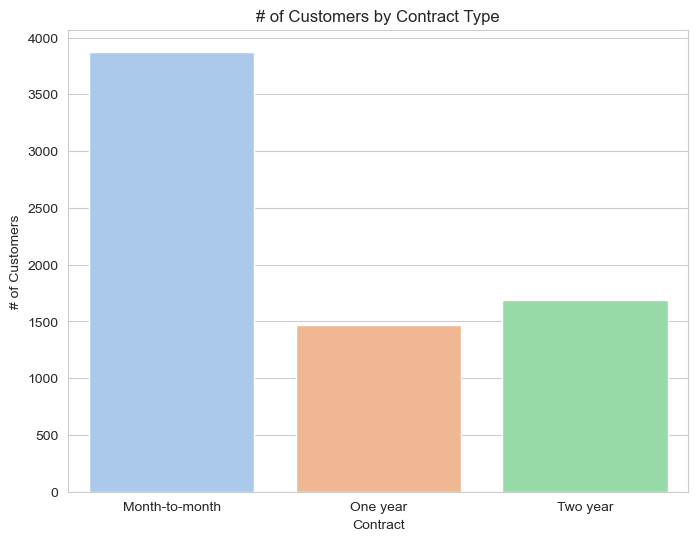

In [77]:
# Result : According to this graph, the majority of customers are associated with
#a month-to-month contract. There are an equal number of customers in the one-year and two-year contracts

#look at the  of customers by different contracts.
plt.figure(figsize=(8, 6))  
sns.countplot(data=telecom_customer, x='Contract', palette='pastel') 
plt.ylabel('# of Customers')  
plt.title('# of Customers by Contract Type')  
plt.show()

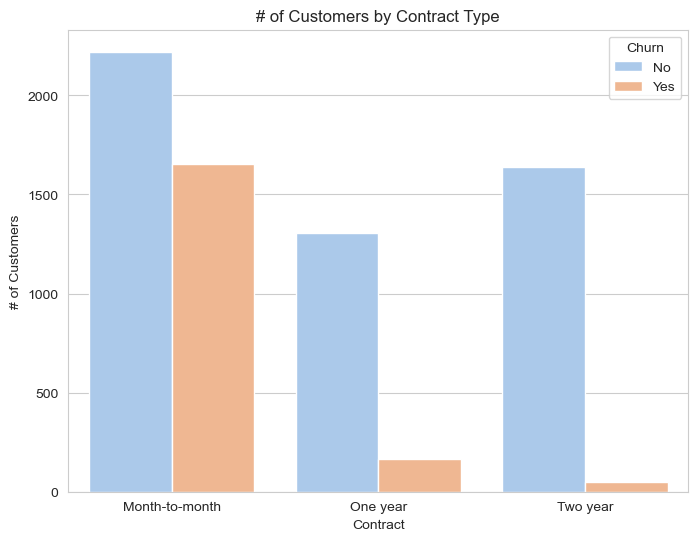

In [78]:
# Result :  According to this graph, the majority of customers are associated with
#a month-to-month contract. There are an equal number of customers in the one-year and two-year contracts
#looking  number of customers by different contracts and control for churn possibiltiy 

plt.figure(figsize=(8, 6)) 
sns.countplot(data=telecom_customer, x='Contract', palette='pastel',hue = "Churn")  
plt.title('# of Customers by Contract Type')  
plt.show()

In [79]:
df.Churn.value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\4107109837.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_customer[telecom_customer['Contract']=='Month-to-month']['tenure'],
C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\4107109837.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax

Text(0.5, 1.0, 'Two Year Contract')

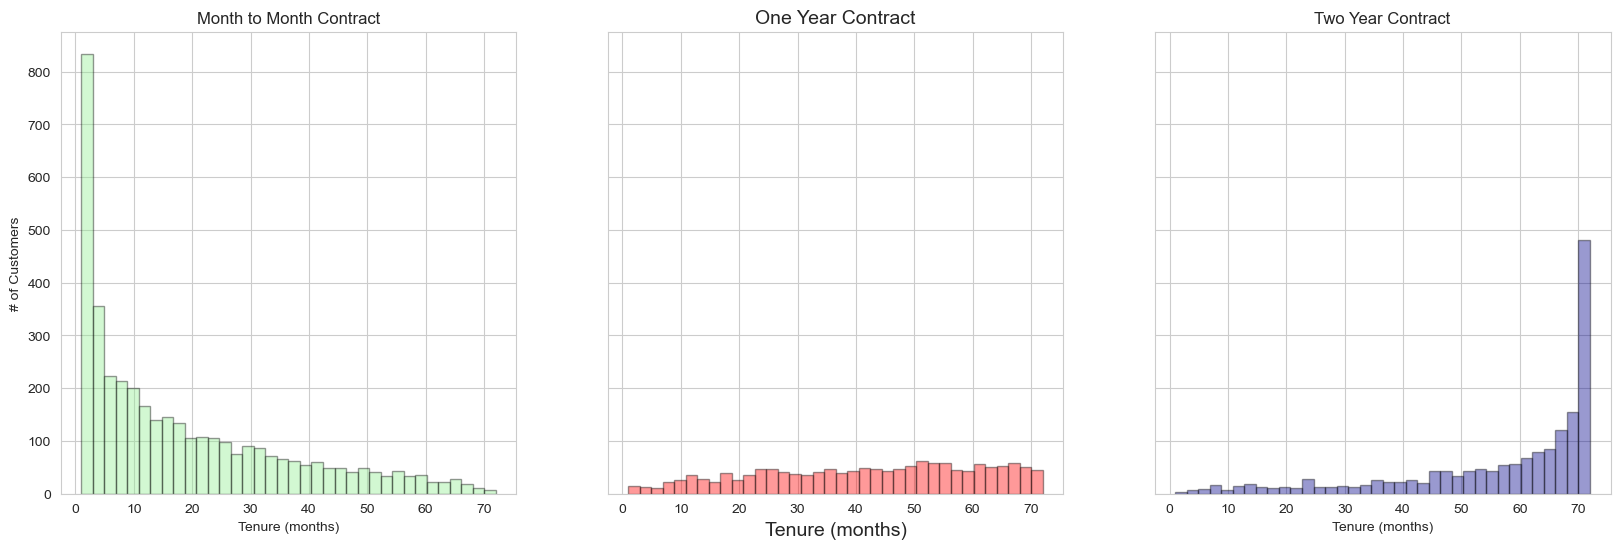

In [80]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_customer[telecom_customer['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'lightgreen',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_customer[telecom_customer['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'red',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_customer[telecom_customer['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

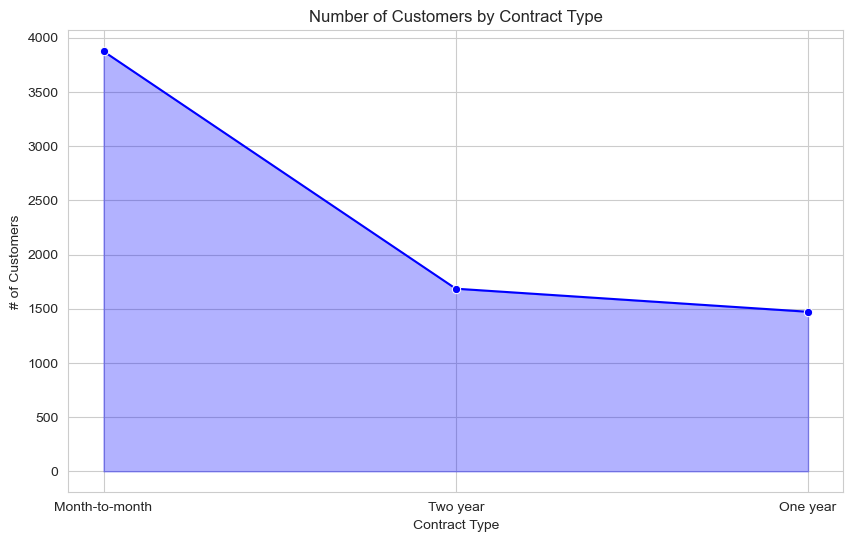

In [81]:
contract_counts = telecom_customer['Contract'].value_counts()
plt.figure(figsize=(10, 6))  
sns.lineplot(x=contract_counts.index, y=contract_counts.values, marker='o', color='blue')  
plt.fill_between(contract_counts.index, contract_counts.values, color='blue', alpha=0.3)  
plt.xlabel('Contract Type')  
plt.ylabel('# of Customers')  
plt.title('Number of Customers by Contract Type')  
plt.show()

In [82]:
telecom_customer.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'yk'], dtype=object)

C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\651625623.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=telecom_customer, x=item, ax=axes[i, 0], palette=color_palettes[i])
C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\651625623.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=telecom_customer, x=item, ax=axes[i, 0], palette=color_palettes[i])
C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\651625623.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=telecom_customer, x=item, ax=axes[i, 0]

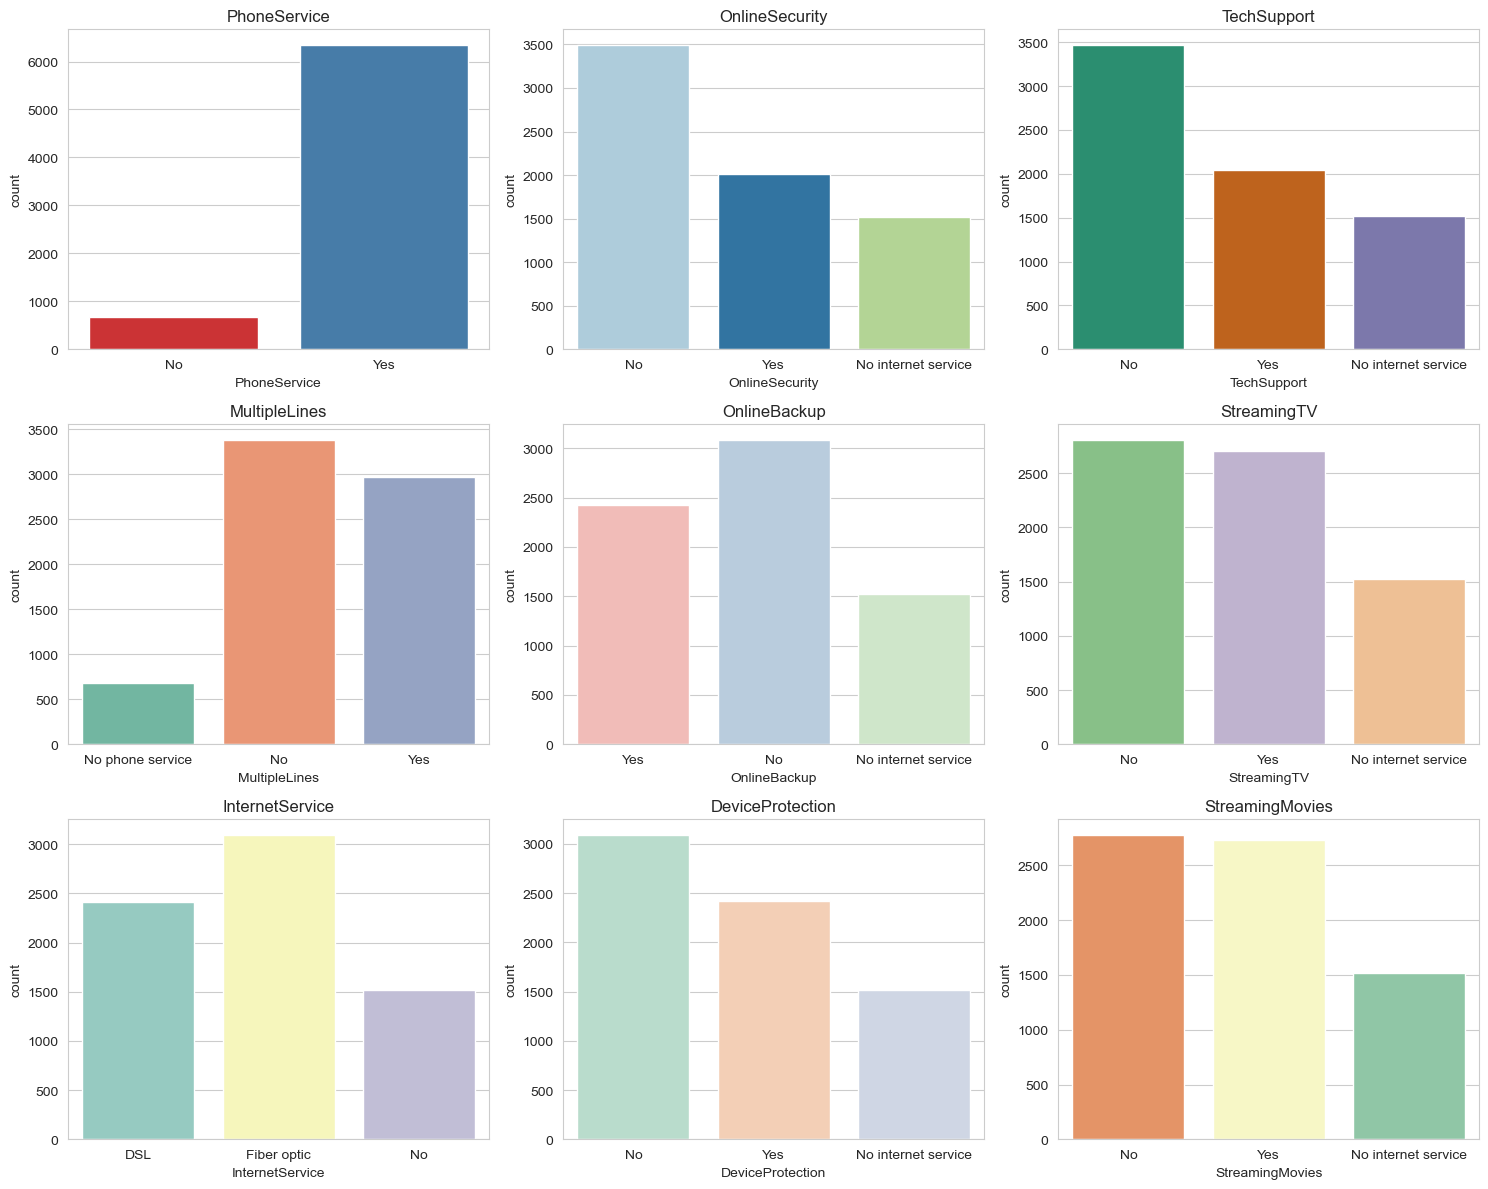

In [84]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

color_palettes = ['Set1', 'Set2', 'Set3', 'Paired', 'Pastel1', 'Pastel2', 'Dark2', 'Accent', 'Spectral']

for i, item in enumerate(services):
    if i < 3:
        ax = sns.countplot(data=telecom_customer, x=item, ax=axes[i, 0], palette=color_palettes[i])
    elif 3 <= i < 6:
        ax = sns.countplot(data=telecom_customer, x=item, ax=axes[i - 3, 1], palette=color_palettes[i])
    elif 6 <= i < 9:
        ax = sns.countplot(data=telecom_customer, x=item, ax=axes[i - 6, 2], palette=color_palettes[i])
    ax.set_title(item)

plt.tight_layout()
plt.show()

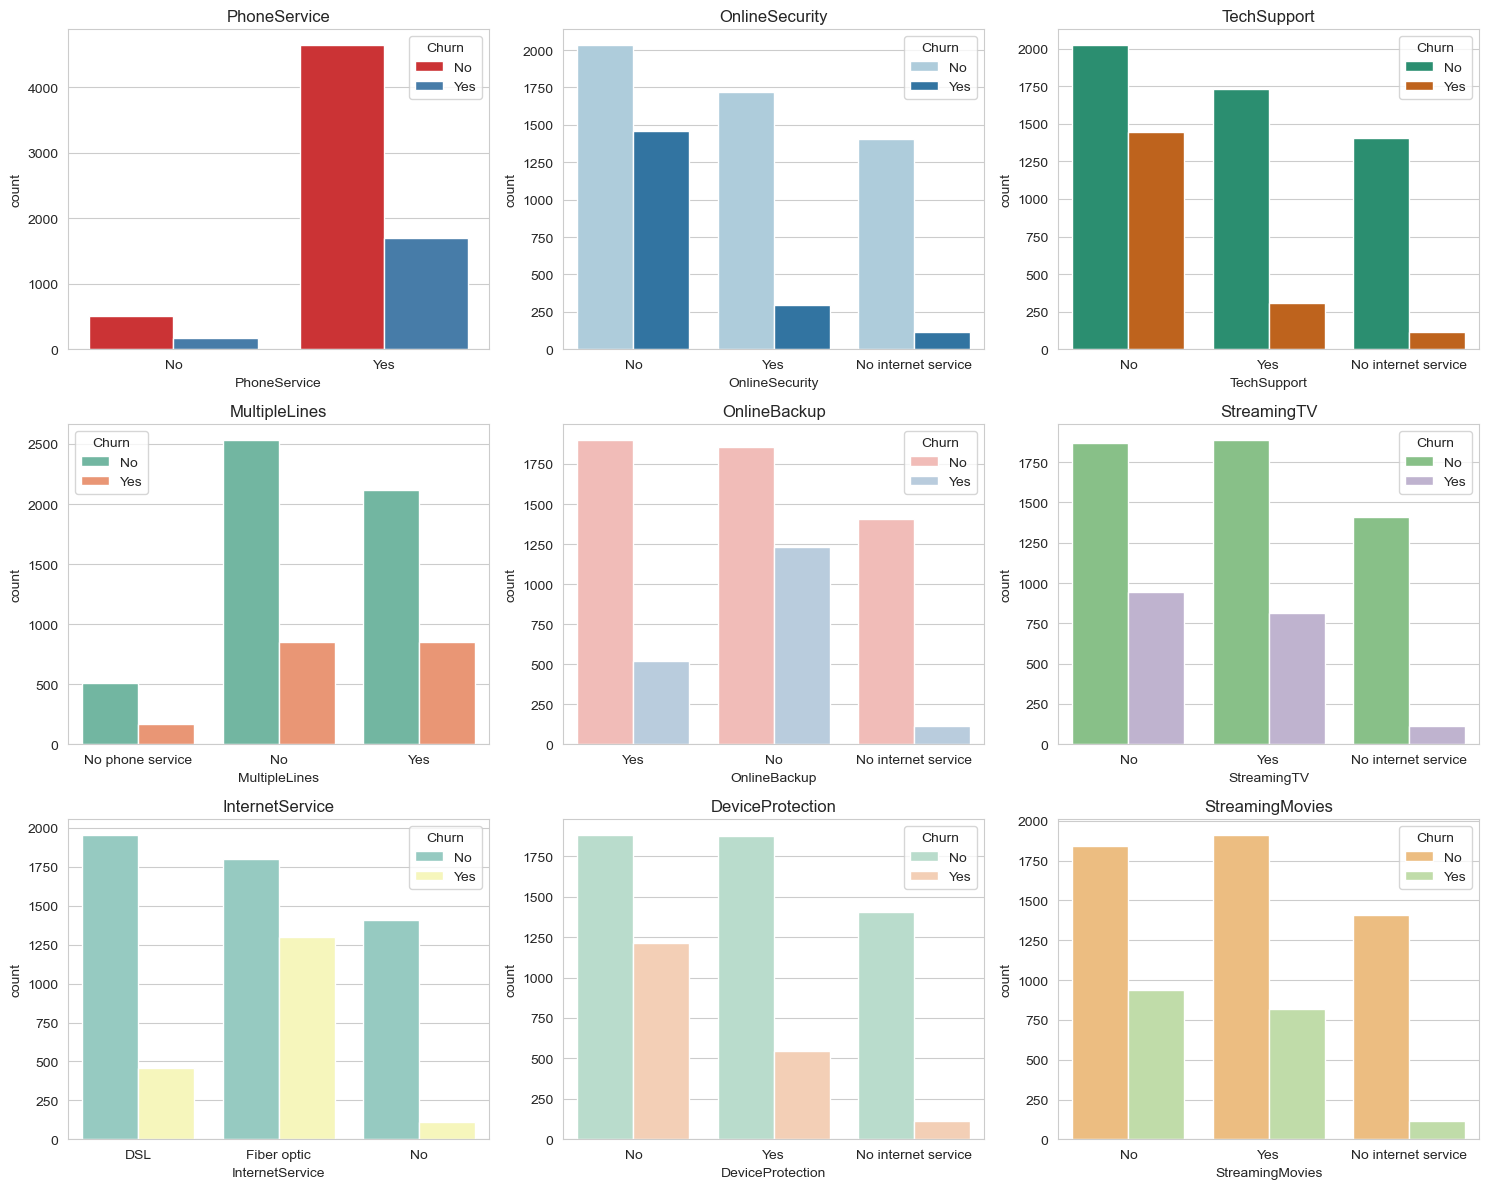

In [85]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

color_palettes = ['Set1', 'Set2', 'Set3', 'Paired', 'Pastel1', 'Pastel2', 'Dark2', 'Accent', 'Spectral']

for i, item in enumerate(services):
    if i < 3:
        ax = sns.countplot(data=telecom_customer, x=item, ax=axes[i, 0], palette=color_palettes[i],hue = "Churn")
    elif 3 <= i < 6:
        ax = sns.countplot(data=telecom_customer, x=item, ax=axes[i - 3, 1], palette=color_palettes[i], hue = "Churn")
    elif 6 <= i < 9:
        ax = sns.countplot(data=telecom_customer, x=item, ax=axes[i - 6, 2], palette=color_palettes[i],hue = "Churn")
    ax.set_title(item)

plt.tight_layout()
plt.show()

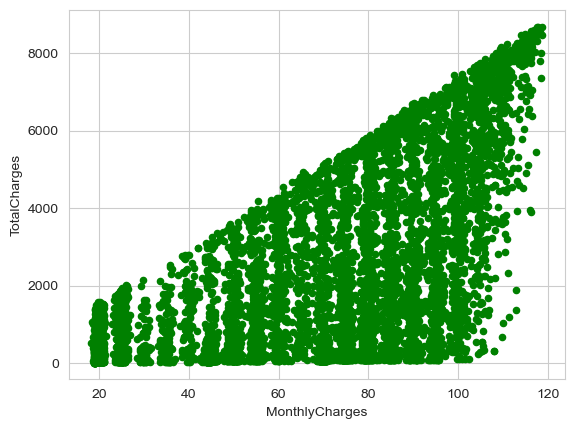

In [86]:
# Ckecking the relation between totol and monthly charges 

telecom_customer[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges', color = 'green')
ax.set_facecolor('lightgray')  
ax.get_xaxis().set_tick_params(color='red')  
ax.get_yaxis().set_tick_params(color='blue') 
plt.show()

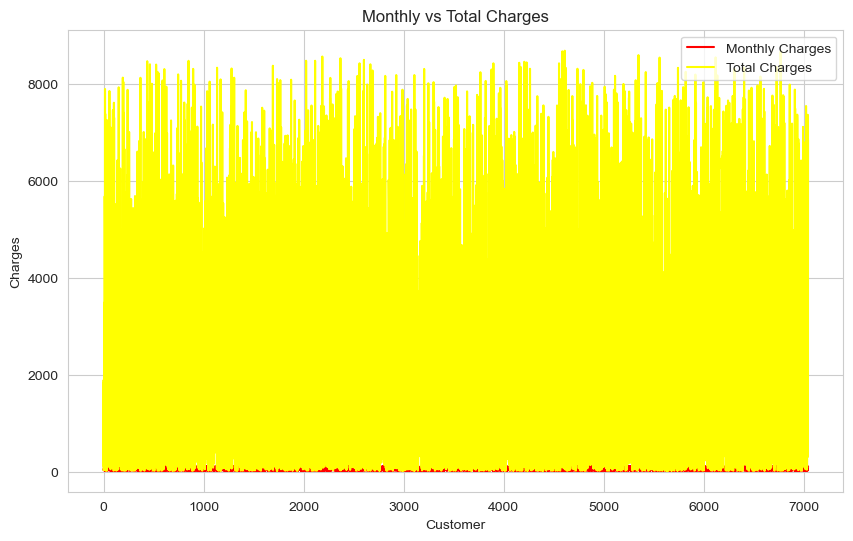

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(telecom_customer['MonthlyCharges'], label='Monthly Charges', color='red')
plt.plot(telecom_customer['TotalCharges'], label='Total Charges', color='yellow')
plt.xlabel('Customer')
plt.ylabel('Charges')
plt.title('Monthly vs Total Charges')
plt.legend()
plt.show()

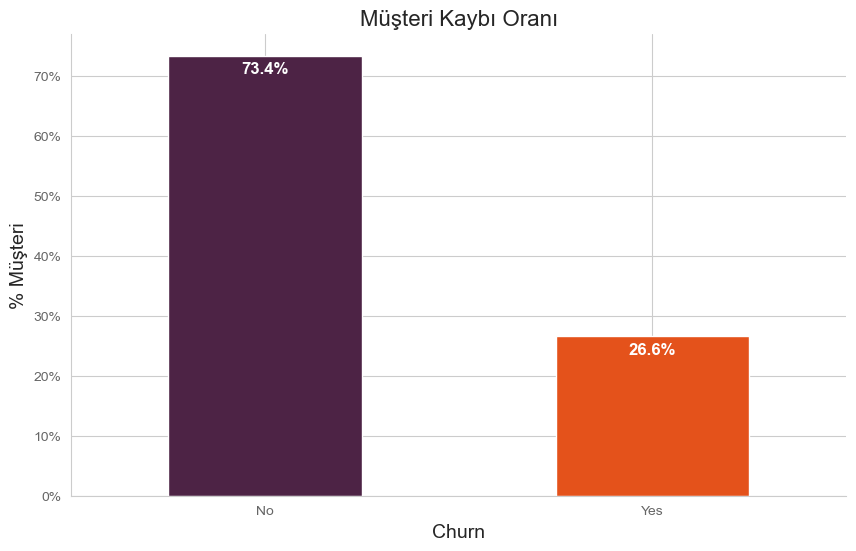

In [89]:
colors = ['#4D2345', '#E4521B']

ax = (telecom_customer['Churn'].value_counts() * 100.0 / len(telecom_customer)).plot(kind='bar',
                                                                           stacked=True,
                                                                           rot=0,
                                                                           color=colors,
                                                                           figsize=(10, 6)) 
                                                                                                                                                                            
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylabel('% Müşteri', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Müşteri Kaybı Oranı', size=16)
totals = [i.get_width() for i in ax.patches]
total = sum(totals)


for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() - 3,
            str(round((i.get_height() / total), 1)) + '%',
            fontsize=12,
            color='white',
            ha='center',
            weight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['bottom'].set_color('#CCCCCC')
ax.tick_params(axis='x', colors='#666666')
ax.tick_params(axis='y', colors='#666666')

plt.show()

C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\2851252882.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = telecom_customer['Churn'], y = telecom_customer['tenure'],palette=colors )


<Axes: xlabel='Churn', ylabel='tenure'>

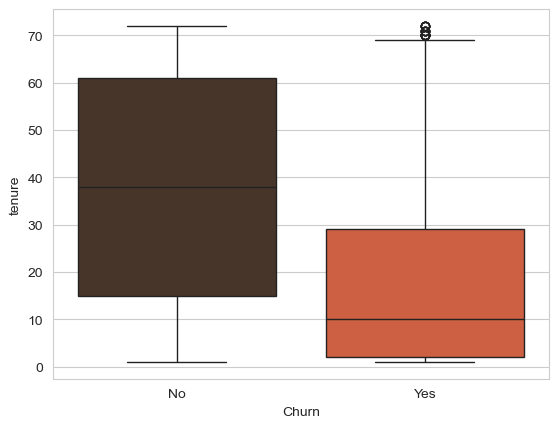

In [91]:
colors = [ '#4D3425', '#E4512B']
sns.boxplot(x = telecom_customer['Churn'], y = telecom_customer['tenure'],palette=colors ) 


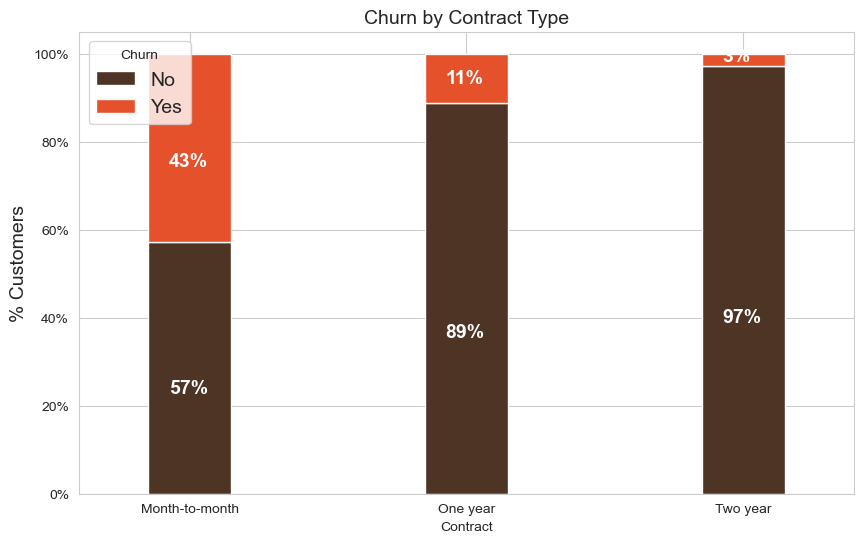

In [93]:
#CHURN BY CONTRACT TYPE 
colors = ['#4D3425', '#E4512B']

# Grouping the data and creating a stacked bar plot
contract_churn = telecom_customer.groupby(['Contract', 'Churn']).size().unstack()
ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width=0.3,
                                                                stacked=True,
                                                                rot=0,
                                                                figsize=(10, 6),
                                                                color=colors)

# Formatting the y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Legend, axis labels, and title
ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Contract Type', size=14)

# Adding data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white',
                weight='bold',
                size=14)

plt.show() 

<Figure size 1000x600 with 0 Axes>

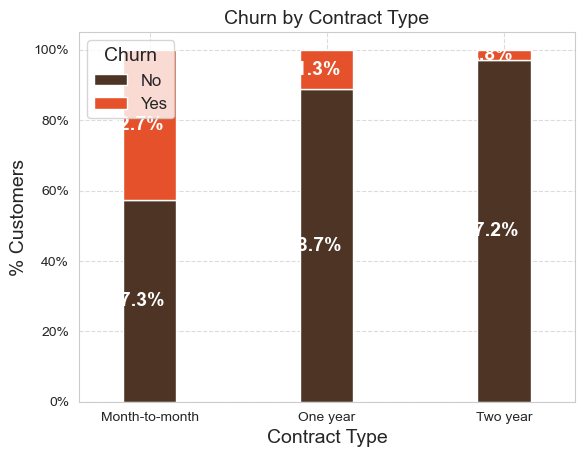

In [94]:
colors = ['#4D3425', '#E4512B']
contract_churn = telecom_customer.groupby(['Contract', 'Churn']).size().unstack()
totals = contract_churn.sum(axis=1)
contract_churn_percent = contract_churn.divide(totals, axis=0) * 100
plt.figure(figsize=(10, 6))
contract_churn_percent.plot(kind='bar', stacked=True, color=colors, width=0.3)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('% Customers', size=14)
plt.xlabel('Contract Type', size=14)
plt.title('Churn by Contract Type', size=14)
plt.legend(title='Churn', title_fontsize='14', fontsize='12', loc='best')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate('{:.1f}%'.format(height), (x + .25 * width, y + height / 2),
                 color='white', weight='bold', size=14, ha='center', va='center')
plt.show()

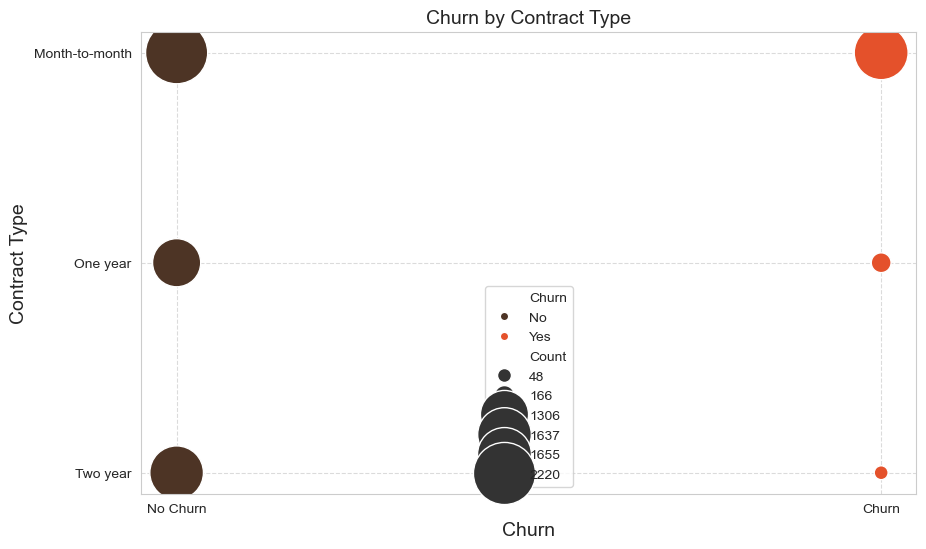

CONTRACT_CHURNNN
Churn        Contract    No   Yes
0      Month-to-month  2220  1655
1            One year  1306   166
2            Two year  1637    48


In [96]:
contract_churn = contract_churn.reset_index().rename(columns={'index': 'Contract'})

# Melt the DataFrame to long format
contract_churn_melted = contract_churn.melt(id_vars='Contract', var_name='Churn', value_name='Count')

colors = ['#4D3425', '#E4512B']


plt.figure(figsize=(10, 6))
sns.scatterplot(data=contract_churn_melted, x='Churn', y='Contract', size='Count', hue='Churn', palette=colors, sizes=(100, 2000))


plt.xlabel('Churn', size=14)
plt.ylabel('Contract Type', size=14)
plt.title('Churn by Contract Type', size=14)


plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


print("CONTRACT_CHURNNN")
print(contract_churn.head())

<Figure size 800x600 with 0 Axes>

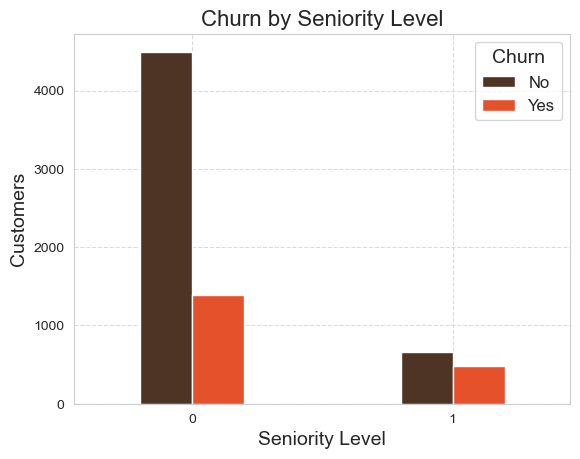

In [97]:
colors = ['#4D3425', '#E4512B']

seniority_churn = telecom_customer.groupby(['SeniorCitizen', 'Churn']).size().unstack()

plt.figure(figsize=(8, 6))


seniority_churn.plot(kind='bar', width=0.4, color=colors)


plt.ylabel( 'Customers', size=14)
plt.xlabel('Seniority Level', size=14)
plt.title('Churn by Seniority Level', size=16)

plt.legend(title='Churn', title_fontsize=14, fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)

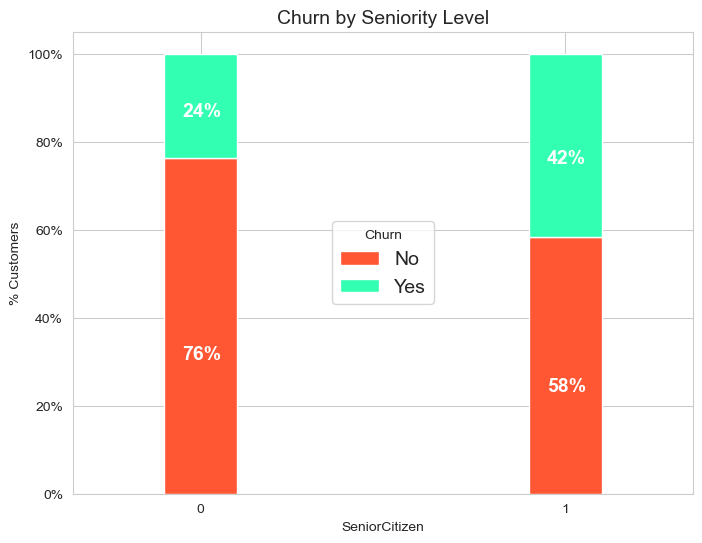

In [98]:
colors = ['#FF5733', '#33FFB2']  

seniority_churn = telecom_customer.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14) 

C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\858745690.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_customer.MonthlyCharges[(telecom_customer["Churn"] == 'No') ],
C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\858745690.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_customer.MonthlyCharges[(telecom_customer["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

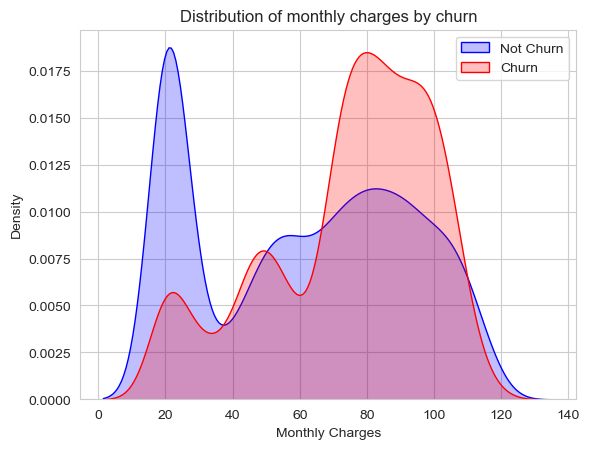

In [100]:
#CHURN BY MONTHLY CHARGES :
ax = sns.kdeplot(telecom_customer.MonthlyCharges[(telecom_customer["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(telecom_customer.MonthlyCharges[(telecom_customer["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\4068954888.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_customer.TotalCharges[(telecom_customer["Churn"] == 'No') ],
C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\4068954888.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_customer.TotalCharges[(telecom_customer["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of total charges by churn')

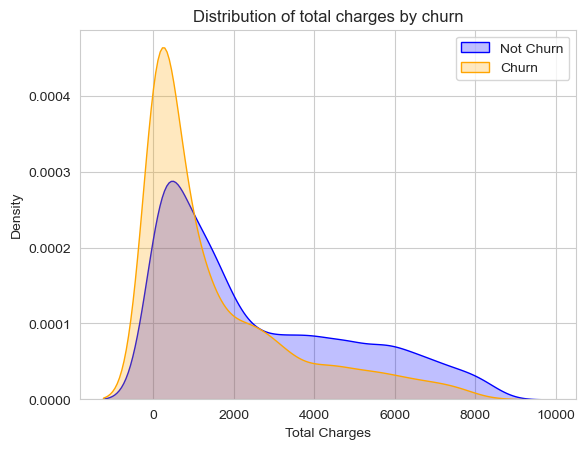

In [102]:
#CHURN BY TOTAL CHARGES :
ax = sns.kdeplot(telecom_customer.TotalCharges[(telecom_customer["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(telecom_customer.TotalCharges[(telecom_customer["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [104]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,yk
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,NaN
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NaN
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,NaN
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,NaN
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,NaN
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,NaN


In [105]:
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,yk,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,NaN,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
1,0,34,56.95,1889.50,NaN,False,False,False,False,False,...,True,False,True,False,False,False,False,True,True,False
2,0,2,53.85,108.15,NaN,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
3,0,45,42.30,1840.75,NaN,False,False,False,False,False,...,True,False,True,False,True,False,False,False,True,False
4,0,2,70.70,151.65,NaN,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,NaN,False,False,False,False,False,...,True,False,False,True,False,False,False,True,True,False
7039,0,72,103.20,7362.90,NaN,False,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False
7040,0,11,29.60,346.45,NaN,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
7041,1,4,74.40,306.60,NaN,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True


In [106]:
df_dummies.drop(["yk"], axis=1,inplace=True)

In [107]:
df.drop(["customerID"], axis=1,inplace=True)

In [108]:
X = df.drop("Churn", axis=1)
y = df.drop("Churn", axis=1)
X = pd.get_dummies(X)
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,yk,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,NaN,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,NaN,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,NaN,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,NaN,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,NaN,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,NaN,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.90,NaN,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,NaN,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
7041,1,4,74.40,306.60,NaN,False,True,False,True,True,...,False,True,False,False,False,True,False,False,False,True


In [109]:
# Logistic Regression: 
y = df_dummies['Churn_Yes'].values
X = df_dummies.drop(columns = ['Churn_Yes'], axis = 1 )

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [110]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No
0,0.0,0.000000,0.115423,0.001275,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.014085,0.521891,0.015330,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [111]:
df.dropna(inplace=True)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [113]:
from sklearn.linear_model import LogisticRegression
df.dropna(inplace=True)
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [114]:
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

1.0


C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\4078496238.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_weights.values, y=top_10_weights.index, palette='viridis')


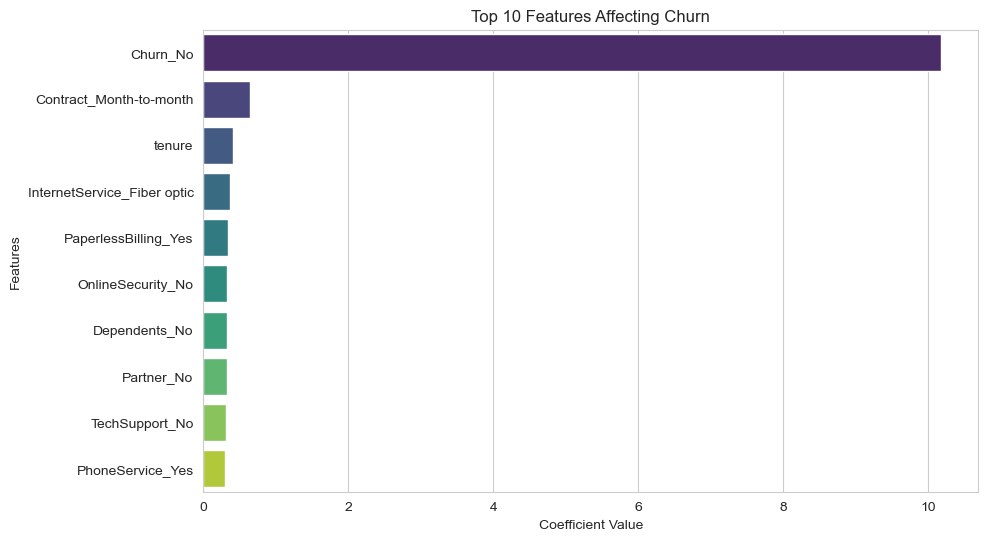

In [115]:
weights = pd.Series(abs(model.coef_[0]), index=X.columns)

top_10_weights = weights.sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_weights.values, y=top_10_weights.index, palette='viridis')
plt.title('Top 10 Features Affecting Churn')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show() 

In [116]:
weights

SeniorCitizen                               0.117875
tenure                                      0.415500
MonthlyCharges                              0.233032
TotalCharges                                0.121132
customerID_0002-ORFBO                       0.002129
                                             ...    
PaymentMethod_Bank transfer (automatic)     0.091371
PaymentMethod_Credit card (automatic)       0.061156
PaymentMethod_Electronic check              0.290566
PaymentMethod_Mailed check                  0.113753
Churn_No                                   10.178203
Length: 7078, dtype: float64

C:\Users\hilal\AppData\Local\Temp\ipykernel_8264\1153882509.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_weights.values, y=bottom_10_weights.index, palette='coolwarm')


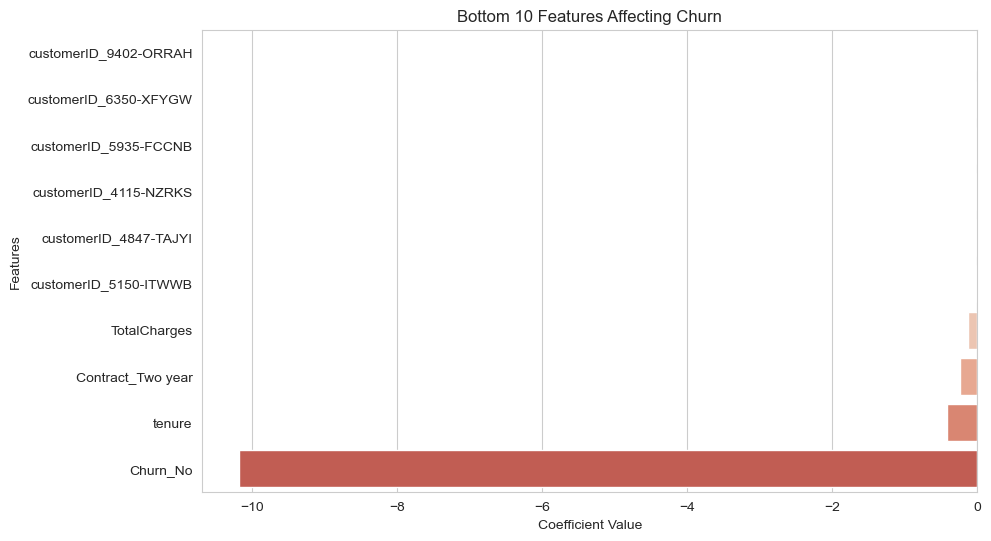

In [117]:
weights = pd.Series(model.coef_[0], index=X.columns)

bottom_10_weights = weights.sort_values(ascending=False)[-10:]

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_10_weights.values, y=bottom_10_weights.index, palette='coolwarm')
plt.title('Bottom 10 Features Affecting Churn')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [120]:
#Random FOrest :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8464818763326226


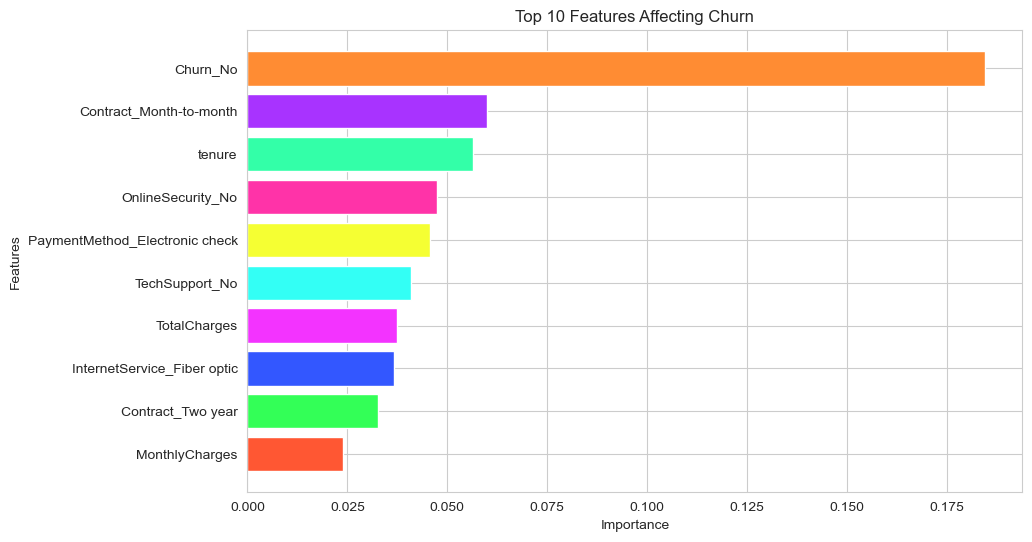

In [121]:
# Feature importances 
importances = model_rf.feature_importances_
weights = pd.Series(importances, index=X.columns.values)

top_10_weights = weights.sort_values()[-10:]

colors = ['#FF5733', '#33FF57', '#3357FF', '#F333FF', '#33FFF5', '#F5FF33', '#FF33A8', '#33FFA8', '#A833FF', '#FF8C33']

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_weights.index, top_10_weights.values, color=colors)
plt.title('Top 10 Features Affecting Churn')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [122]:
# SVM
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

1.0

In [123]:
print(recall_score (y_test,preds))

1.0


In [124]:
print(confusion_matrix(y_test,preds))

[[1052    0]
 [   0  355]]


In [125]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1052
        True       1.00      1.00      1.00       355

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



<Figure size 1000x600 with 0 Axes>

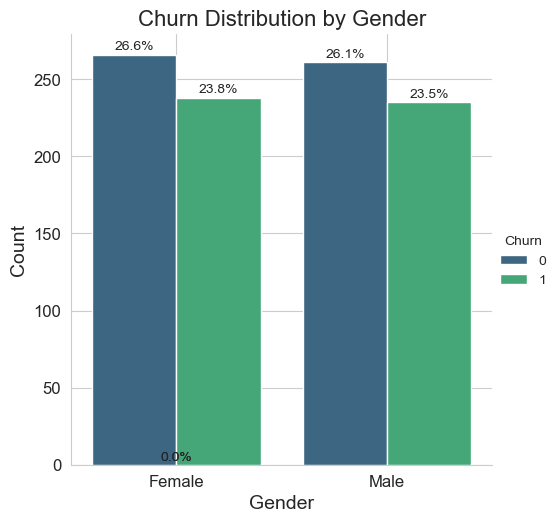

In [126]:
data = {'gender': np.random.choice(['Male', 'Female'], size=1000),
        'Churn': np.random.choice([0, 1], size=1000)}
telecom_cust = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
ax = sns.catplot(x="gender", kind="count", hue="Churn", data=telecom_cust, palette='viridis')

total = len(telecom_cust)
for p in ax.ax.patches:
    height = p.get_height()
    ax.ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.1f}%'.format(height / total * 100),
            ha="center", fontsize=10)

plt.title('Churn Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [127]:
#ADA BOOST :
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

C:\Users\hilal\OneDrive\Documents\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


1.0

In [128]:
# XG BOOOST
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

1.0